# PISA 2012 Exploration 
## by Maryna Misyura

## Preliminary Wrangling

> This document explores a dataset containing PISA 2012 survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a conventional school test.

In [60]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [460]:
# load in the dataset into a  dataframe, print statistics
pisa = pd.read_csv(r'C:\Users\Marin\UGitCourse\csv\pisa2012.csv', encoding = "latin-1",
                    usecols=['CNT', #'IMMIG', 'ST71Q01','LANGN', 'ST69Q01', 'ST70Q01',
'PV1MATH','PV1READ', 'STIDSTD', 'PV1SCIE','ST04Q01','ST01Q01', 'SCHOOLID', 'ESCS','ST29Q04','ST57Q01','INTMAT', 'LMINS', 'MMINS','SMINS', 'SUBNORM', 'ST35Q04','ST35Q05','ST35Q06', 'ANXMAT', 'SCMAT'])
#There are 635 columns in the dataset. I'll have to choose just some of them for the analysis

In [461]:
#rename some columns 
pisa = pisa.rename(columns={'CNT': 'Country', 
                            'PV1MATH': 'Math_score', 
                            'PV1READ': 'Reading_score', 
                            'PV1SCIE': 'Science_score', 
                            'ST04Q01': 'Gender', 
                            'ST01Q01': 'Grade', 
                            'SCHOOLID': 'School_ID',
                            'STIDSTD': 'Student_ID',
                            'ESCS' : 'Socio_economic_status',
                            'ST29Q04': 'Students_enjoy_math',
                            'ST57Q01':'Homework_hours',
                            'INTMAT':'Math_interest',
                            # 'IMMIG': 'Immigration_status',
                            #'ST71Q01': 'Language_at_home',
                           #'OUTHOURS':'Out_of_school_study_hours',
                           'LMINS':'Language_in_school_min',
                           'MMINS':'Math_in_school_min',
                           'SMINS':'Science_in_school_min',
                           'SUBNORM':'Math_motivation',
                           'ST35Q04': 'Parents_math_important',
                           'ST35Q05':'Parents_math_for_career',
                           'ST35Q06':'Parents_like_math',
                           'ANXMAT':'Math_anxiety',
                           'SCMAT':'Math_self_concept'})

In [528]:
#print statistics
print(pisa.shape)

(485490, 27)


In [529]:
print(pisa.dtypes)

Country                      object
School_ID                     int64
Student_ID                    int64
Grade                         int64
Gender                       object
Students_enjoy_math        category
Parents_math_important     category
Parents_math_for_career    category
Parents_like_math          category
Homework_hours              float64
ST69Q01                     float64
ST70Q01                     float64
Language_at_home            float64
Math_anxiety                float64
Socio_economic_status       float64
Immigration_status           object
Math_interest               float64
LANGN                        object
Language_in_school_min      float64
Math_in_school_min          float64
Math_self_concept           float64
Science_in_school_min       float64
Math_motivation             float64
Math_score                  float64
Reading_score               float64
Science_score               float64
Total_in_school_min         float64
dtype: object


In [154]:
#Number of countries
print(pisa.Country.unique().shape[0])

68


In [155]:
print(pisa.describe())
#Very strange: max Grade=96 !?

           School_ID          Grade  Homework_hours  Relative_grade  \
count  485490.000000  485490.000000   301367.000000   484617.000000   
mean      240.152197       9.813323        5.493770       -0.162964   
std       278.563016       3.734726        5.383815        0.655558   
min         1.000000       7.000000        0.000000       -3.000000   
25%        61.000000       9.000000        2.000000        0.000000   
50%       136.000000      10.000000        4.000000        0.000000   
75%       291.000000      10.000000        7.000000        0.000000   
max      1471.000000      96.000000       30.000000        3.000000   

        Math_anxiety  Socio_economic_status  Math_interest  \
count  314764.000000          473648.000000  316708.000000   
mean        0.152647              -0.265546       0.212424   
std         0.955031               1.131791       1.004716   
min        -2.370000              -5.950000      -1.780000   
25%        -0.470000              -1.000000      -

In [156]:
base_color = sb.color_palette()[0]

In [87]:
# Proficiency Math Level Score points on the PISA scale
data = [[1, 357.8, 'level 0'], [357.8, 420.1, 'level 1'], [420.1, 482.4, 'level 2'], [482.4,544.7, 'level 3'], [544.7, 607.0, 'level 4'], [607.0, 669.3, 'level 5'],[669.3, 1000000, 'level 6']] 
df_math_levels = pd.DataFrame(data, columns = ['math_min', 'math_max', 'math_level'])
df_math_levels 

,math_min,math_max,math_level
0,1.0,357.8,level 0
1,357.8,420.1,level 1
2,420.1,482.4,level 2
3,482.4,544.7,level 3
4,544.7,607.0,level 4
5,607.0,669.3,level 5
6,669.3,1000000.0,level 6


In [88]:
#Do I need this?
pisa.Enjoy_math.fillna("Unknown", inplace = True) 
pisa.Enjoy_math.unique()


[Native, Unknown, Second-Generation, First-Generation]
Categories (4, object): [Native < First-Generation < Second-Generation < Unknown]

In [462]:
enjoy_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = enjoy_order)
pisa['Students_enjoy_math'] = pisa['Students_enjoy_math'].astype(ordered_cat)
pisa['Parents_like_math'] = pisa['Parents_like_math'].astype(ordered_cat)
pisa['Parents_math_for_career'] = pisa['Parents_math_for_career'].astype(ordered_cat)
pisa['Parents_math_important'] = pisa['Parents_math_important'].astype(ordered_cat)



In [89]:
enjoy_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree', 'Unknown']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = enjoy_order)
pisa['Students_enjoy_math'] = pisa['Students_enjoy_math'].astype(ordered_cat)
pisa['Parents_like_math'] = pisa['Parents_like_math'].astype(ordered_cat)
pisa['Parents_math_for_career'] = pisa['Parents_math_for_career'].astype(ordered_cat)
pisa['Parents_math_important'] = pisa['Parents_math_important'].astype(ordered_cat)



In [373]:
print(pisa.dropna().shape)
print(pisa.shape)

(1, 21)
(485490, 21)


### What is the structure of your dataset?

> There are 485490 students in the dataset from 68 different countries. 
I chose these features to investigate:<br>
- Numeric: Homework_hours, Socio_economic_status, Math_score, Reading_score, Science_score, Math_interest, Math_motivation, Math_anxiety, Math_self_concept. <br>
- Categorical: Country, Grade, Gender, School_ID. <br>
- Variables Students_enjoy_math, Parents_like_math, Parents_math_important, Parents_math_for_career are ordered categorical variables with the following levels. <br>
'Strongly disagree', 'Disagree', 'Agree', 'Strongly agree' <br>

- math_level # Proficiency Math Level Score points on the PISA scale


### What is/are the main feature(s) of interest in your dataset?

> I'm very interested in finding out what features are best in predicting the math, reading and science test results.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think Socio_economic_status of students will have a big effect on the scores, disadvantaged students will be underperforming. I also hope that if students enjoy subject and independent time studying (homework) they will perform better.<br>
It is interesting if gender of a student has influence on test result.


## Univariate Exploration

> Quick view on numeric variables.

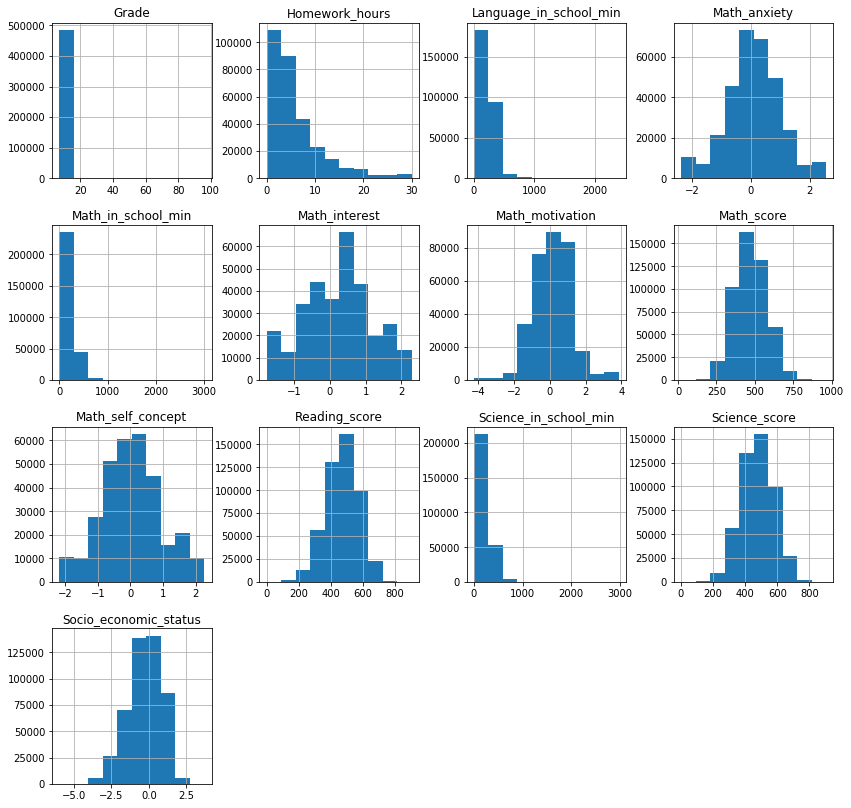

In [374]:
pisa[['Grade', 'Gender', 'Homework_hours','Socio_economic_status','Math_interest', 'Language_in_school_min', 
      'Math_in_school_min', 'Science_in_school_min', 'Math_motivation', 
      'Parents_math_important', 'Math_self_concept', 'Math_score', 'Math_anxiety','Reading_score','Science_score']].hist(figsize=(14,14));


Questions:
- grade right skewed
- variables ..study_min - 2000min~33hours study a week is too much. Is this an error?
- math(reading, science) scores near 0 or 1000 - who are those students?

> *1) distribution of the main variables: math, reading and science scores.*

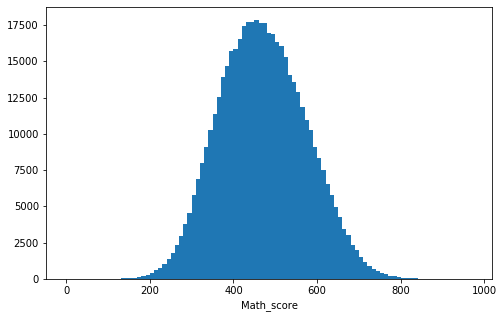

In [139]:
binsize = 10
bins = np.arange(0, pisa['Math_score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Math_score', bins = bins)
plt.xlabel('Math_score')
plt.show()

*Are values near zero and 1000 are outliers, mistakes or real data points?*

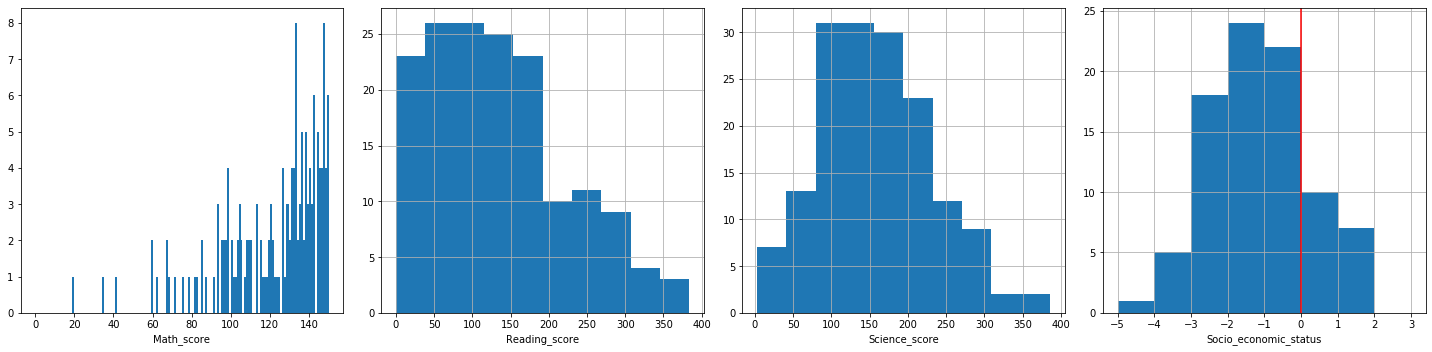

In [196]:
#Low math scores 
binsize = 1
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=[20,5])
plt.subplot(1, 4, 1)
bins = np.arange(0, 150+binsize, binsize)
#plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Math_score', bins = bins)
plt.xlabel('Math_score')
plt.subplot(1, 4, 2)
pisa.query('Math_score<=150')['Reading_score'].hist()
plt.xlabel('Reading_score')
plt.subplot(1, 4, 3)
pisa.query('Math_score<=150')['Science_score'].hist()
plt.xlabel('Science_score')
plt.subplot(1, 4, 4)
bins_ESCS = [-5, -4, -3, -2, -1, 0, 1, 2, 3]
pisa.query('Math_score<=150')['Socio_economic_status'].hist(bins = bins_ESCS)
plt.axvline(x=0, color='red')
plt.xlabel('Socio_economic_status')
fig.tight_layout()

*All students, who scored <ins>low</ins> on the math PISA test, also get low scores in reading and science. Mostly it's disadvantaged students.* <br>

*Interesting that Reading test results for such students are significantly skewed right. Not sufficient reading skills is one of the reasons for low math test results.*

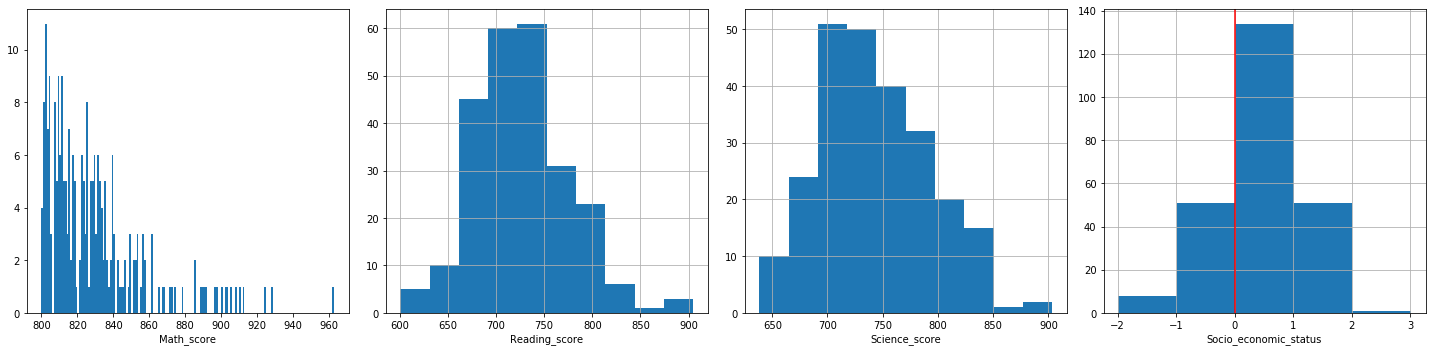

In [198]:
#Big math scores
binsize = 1
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=[20,5])
plt.subplot(1, 4, 1)
bins = np.arange(800, pisa['Math_score'].max()+binsize, binsize)
plt.hist(data = pisa, x = 'Math_score', bins = bins)
plt.xlabel('Math_score')
plt.subplot(1, 4, 2)
pisa.query('Math_score>=800')['Reading_score'].hist()
plt.xlabel('Reading_score');
plt.subplot(1, 4, 3)
pisa.query('Math_score>=800')['Science_score'].hist()
plt.xlabel('Science_score');
plt.subplot(1, 4, 4)
bins = np.arange(pisa.query('Math_score>=800').Socio_economic_status.min(), pisa.query('Math_score>=800').Socio_economic_status.max()+1,1)
pisa.query('Math_score>=800')['Socio_economic_status'].hist(bins = bins)
plt.axvline(x=0, color='red')
plt.xlabel('Socio_economic_status')
fig.tight_layout()

*All students, who scored <ins>high</ins> on the math PISA test, also get high scores in reading and science. It's mostly students with higher social, economic and cultural status* <br>

*It looks like all those were valid data points.*

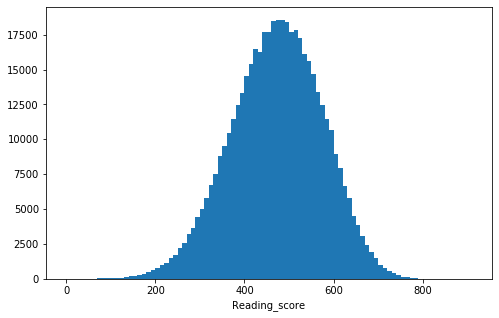

In [193]:
binsize = 10
bins = np.arange(0, pisa['Reading_score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Reading_score', bins = bins)
plt.xlabel('Reading_score')
plt.show()

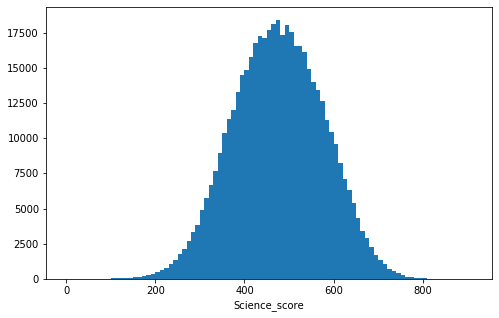

In [15]:
binsize = 10
bins = np.arange(0, pisa['Science_score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Science_score', bins = bins)
plt.xlabel('Science_score')
plt.show()

*All plots for test scores are normally distributed. I guess the PISA test is organized that way to get normally distributed scores as a result.*

>*2) How are students distributed among the countries?*

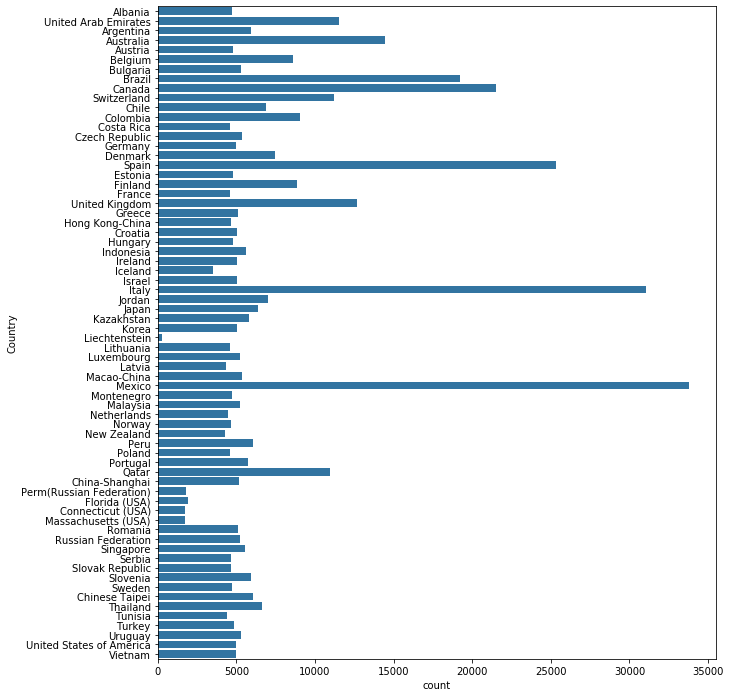

In [15]:
plt.figure(figsize = [10, 12])
sb.countplot(data=pisa, y = 'Country', color = base_color );

*Most countries have around 5000 students participating or more. Countries with less students are actually subregions of other countries. I think it would be more interesting to choose two-three countries and investigate them more. Or maybe choose different states of USA and compare them.*

> 3) Next I want to investigate Socio_economic_status.<br>
Socio_economic_status is the PISA index of economic, social and cultural status (ESCS) created using student reports on parental occupation, the highest level of parental education, and an index of home possessions related to family wealth, home educational resources and possessions related to “classical” culture in the family home.<br>
A negative value merely indicates that the respondents answered less positively than all respondents did on average across OECD countries.

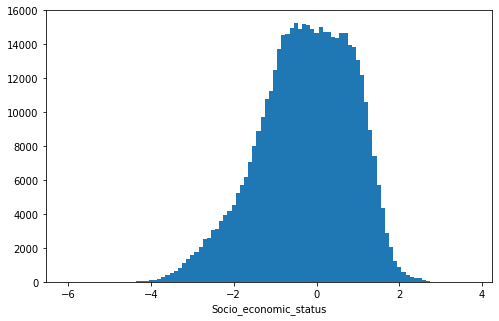

In [234]:
binsize = 0.1
bins = np.arange(pisa['Socio_economic_status'].min() - binsize, pisa['Socio_economic_status'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Socio_economic_status', bins = bins)
plt.xlabel('Socio_economic_status')
plt.show()

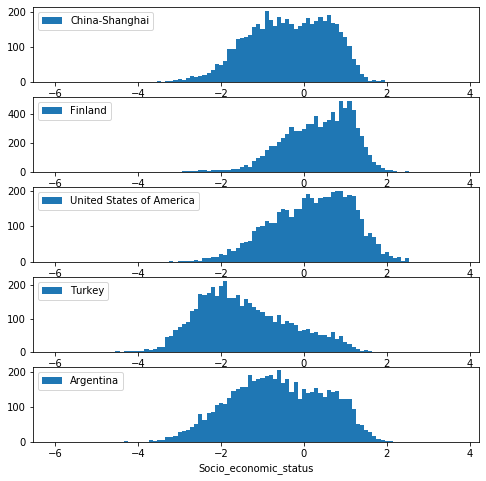

In [236]:
#Socio_economic_status for 5 different countries
plt.figure(figsize = [8, 8]) 
plt.subplot(5, 1, 1)
plt.hist(data = pisa[pisa['Country'] == 'China-Shanghai'], x = 'Socio_economic_status', bins = bins, label='China-Shanghai');
plt.legend(loc='upper left');
plt.subplot(5, 1, 2)
plt.hist(data = pisa[pisa['Country'] == 'Finland'], x = 'Socio_economic_status', bins = bins, label='Finland');
plt.legend(loc='upper left');
plt.subplot(5, 1, 3)
plt.hist(data = pisa[pisa['Country'] == 'United States of America'], x = 'Socio_economic_status', bins = bins, label='United States of America');
plt.legend(loc='upper left');
plt.subplot(5, 1, 4)
plt.hist(data = pisa[pisa['Country'] == 'Turkey'], x = 'Socio_economic_status', bins = bins, label='Turkey');
plt.legend(loc='upper left');
plt.subplot(5, 1, 5)
plt.hist(data = pisa[pisa['Country'] == 'Argentina'], x = 'Socio_economic_status', bins = bins, label='Argentina');
plt.legend(loc='upper left');
plt.xlabel('Socio_economic_status');


Socio_economic_status is slightly skewed left for all countries. I would like later to cut Socio_economic_status into quarters to be able to compare 

> 4) Grade distibution

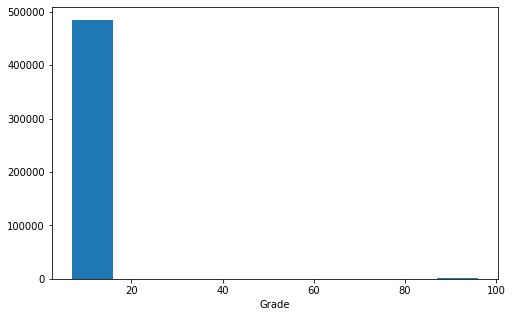

In [19]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Grade')
plt.xlabel('Grade')
plt.show()

As I noticed earlier there is an outlier. 

In [20]:
print(pisa[pisa['Grade']>14].Grade.value_counts())
#Percent of student body
100* pisa[pisa['Grade']>14].Country.value_counts()/pisa.Country.count()

96    873
Name: Grade, dtype: int64


Portugal     0.105666
Vietnam      0.038930
Belgium      0.023481
Lithuania    0.009269
Latvia       0.002472
Name: Country, dtype: float64

PISA-2012-technical-report-final.pdf file indicates that values for Grade column should be from 7 to 14. <br>
I think 96 means that the grade is unknown. In all countries such values are 0.1% or less.<br>
It would be safe to fill them with mean value.

In [21]:
pisa[((pisa['Grade']<=14) & ((pisa['Country']=='Lithuania')|(pisa['Country']=='Portugal')|(pisa['Country']=='Vietnam')|(pisa['Country']=='Belgium')|(pisa['Country']=='Latvia')))].groupby('Country')['Grade'].mean().round()

Country
Belgium      10.0
Latvia        9.0
Lithuania     9.0
Portugal      9.0
Vietnam      10.0
Name: Grade, dtype: float64

In [22]:
pisa.loc[((pisa['Country']=='Vietnam')|(pisa['Country']=='Belgium')) & (pisa.Grade == 96), ['Grade']] = 10
pisa.loc[((pisa['Country']=='Lithuania')|(pisa['Country']=='Portugal')|(pisa['Country']=='Latvia')) & (pisa.Grade == 96), ['Grade']] = 9

In [23]:
#Test
print(pisa[pisa['Grade']>20].shape)
pisa[pisa['Country']=='Lithuania'].Grade.value_counts()

(0, 12)


9     3806
10     525
8      278
7        7
11       2
Name: Grade, dtype: int64

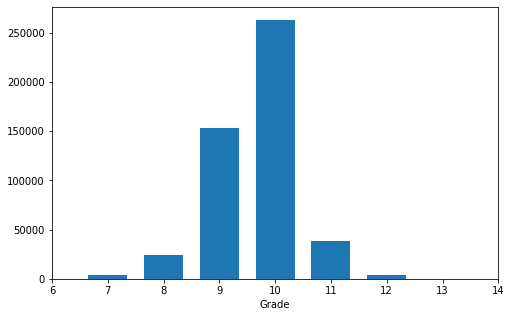

In [24]:
bin_edges = np.arange(6.5, 13.5, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Grade', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(6, 15, 1))
plt.xlabel('Grade')
plt.show()
'Relative_grade'

*Looks like most 15y.o. students around all countries attend 10th grade.*

> *5) Gender distribution*

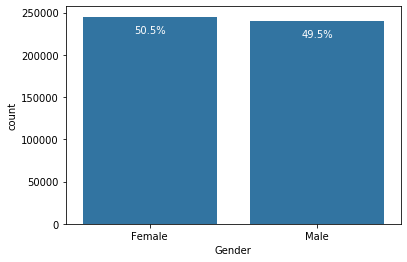

In [257]:
sb.countplot(data = pisa, x = 'Gender', color=base_color);
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = pisa[pisa['Gender']==label.get_text()].shape[0]
    pct_string = '{:0.1f}%'.format(100*count/pisa.shape[0])
    plt.text(loc, count-10000, pct_string, verticalalignment= 'top', horizontalalignment='center',color = 'w')

> *6) School information* <br>
> *School_ID is unique within Country and not within all dataset*

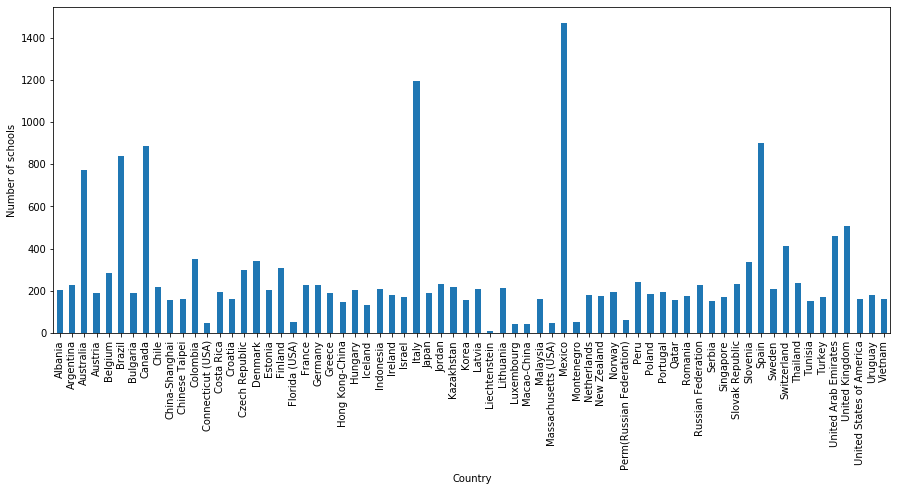

In [519]:
#What is the number of schools in each country participating in PISA?
pisa.groupby(['Country'])['School_ID'].nunique().plot(kind = 'bar', figsize = (15,6));
plt.ylabel('Number of schools');

In [326]:
#What is the average number of students tested from all schools?
pisa.groupby(['Country', 'School_ID']).count()['Student_ID'].mean()

26.54111086813908

*Is there a difference between schools, between average student backgrounds in these schools(Socio_economic_status)?* 
*I'll explore this question in Bivariate Exploration part*

> *6) Time spent on homework at home (Homework set by teacher (hours))*


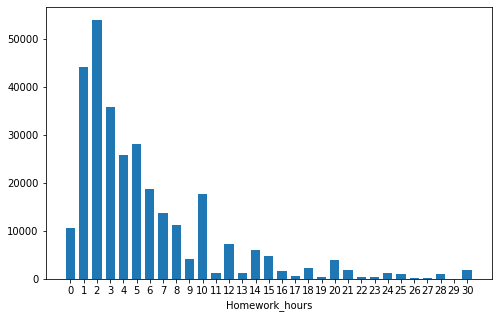

In [341]:
bin_edges = np.arange(-0.5, 31, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Homework_hours', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 31, 1))
plt.xlabel('Homework_hours')
plt.show()

 - *Is the amount of homework assigned by teachers a big influence on test scores?*
 - *Is there a difference in the amount of homework between countries?*
 - *Who spends more time doing homework boys or girls?*
 - *Most students spend on homework 10 hours a week or less.*<br>
*But there are some really hard working students. It's interesting if it would correlate in test scores.*


> *7) Students' and their parents attitude toward mathematics*

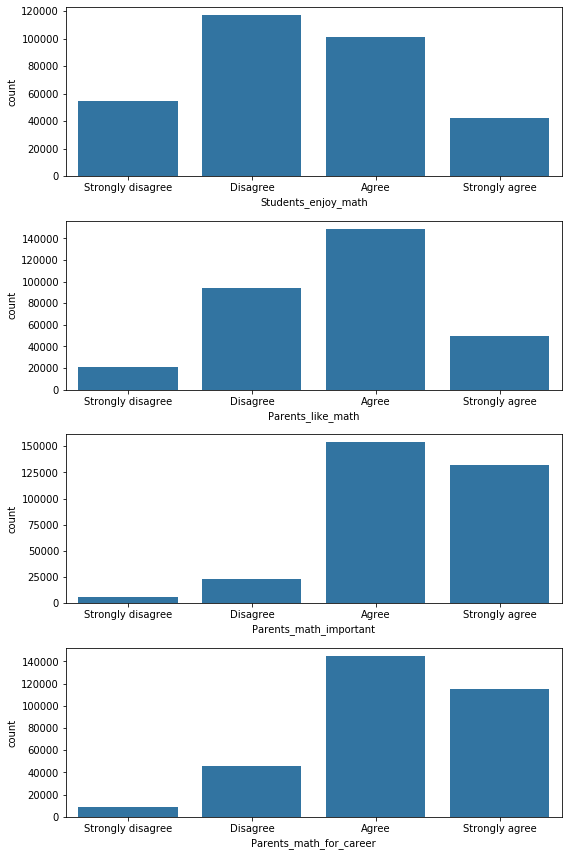

In [353]:
fig, ax = plt.subplots(nrows=4, figsize = [8,12]);
sb.countplot(data = pisa, x = 'Students_enjoy_math', color=base_color, ax = ax[0]);
sb.countplot(data = pisa, x = 'Parents_like_math', color=base_color, ax = ax[1]);
sb.countplot(data = pisa, x = 'Parents_math_important', color=base_color, ax = ax[2]);
sb.countplot(data = pisa, x = 'Parents_math_for_career', color=base_color, ax = ax[3]);
fig.tight_layout()

- *It's sad that overall more students do not enjoy mathematics than enjoy it. Is it different in different countries?*
- *Parents like mathematics more than students*
- *But most parents think that mathematics is important or you will need it for your career. Is it the same for each gender?*
- *Is there correlation with test results?* 

In [ ]:
#???About a third or more students are in the Unknown category for each country.

> *8) Learning time in minutes per week in test language regular class periods at school*
- *Language_in_school_min*
- *Math_in_school_min*
- *Science_in_school_min.*

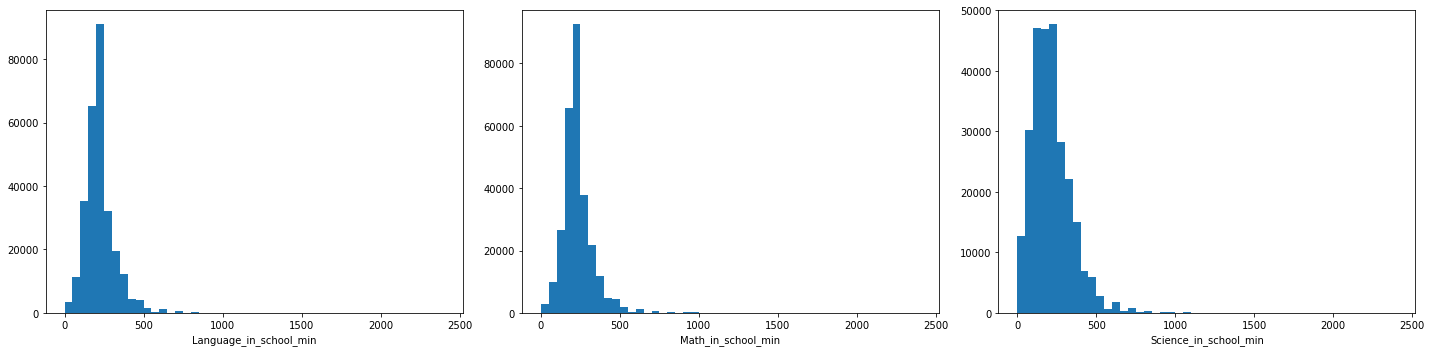

In [394]:
binsize = 50
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=[20,5])
plt.subplot(1, 3, 1)
bins = np.arange(0, pisa.Language_in_school_min.max()+binsize, binsize)
plt.hist(data = pisa, x = 'Language_in_school_min', bins = bins)
plt.xlabel('Language_in_school_min')
plt.subplot(1, 3, 2)
plt.hist(data = pisa, x = 'Math_in_school_min', bins = bins)
plt.xlabel('Math_in_school_min')
plt.subplot(1, 3, 3)
plt.hist(data = pisa, x = 'Science_in_school_min', bins = bins)
#plt.axvline(x=0, color='red')
plt.xlabel('Science_in_school_min')
fig.tight_layout()

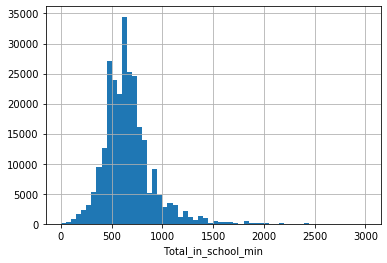

In [463]:
#There are long tails in all three distributions
#The school day can't be longer than 10 hours=600mins, classes are usually 5 day a week, but may be it's 6 days somewhere (like I had in my childhood)
# 9 * 60 * 6 = 3600 mins
#So if I add up all 3 variables, the sum definitely can't be more than 3600 mins

pisa['Total_in_school_min'] = pisa['Language_in_school_min'] + pisa['Math_in_school_min'] + pisa['Science_in_school_min']
binsize = 50
bins = np.arange(0, pisa.Total_in_school_min.max()+binsize, binsize)
pisa.Total_in_school_min.hist(bins=bins)
plt.xlabel('Total_in_school_min');

*The total number study minutes at school is never more than 3600, so while numbers more than 2000min per week look high I think they are valid data points* 
*It would be interesting to investigate who are whose hardworking student* 
*who studying more than 1500 mins per week and if it resulted in higher test results*

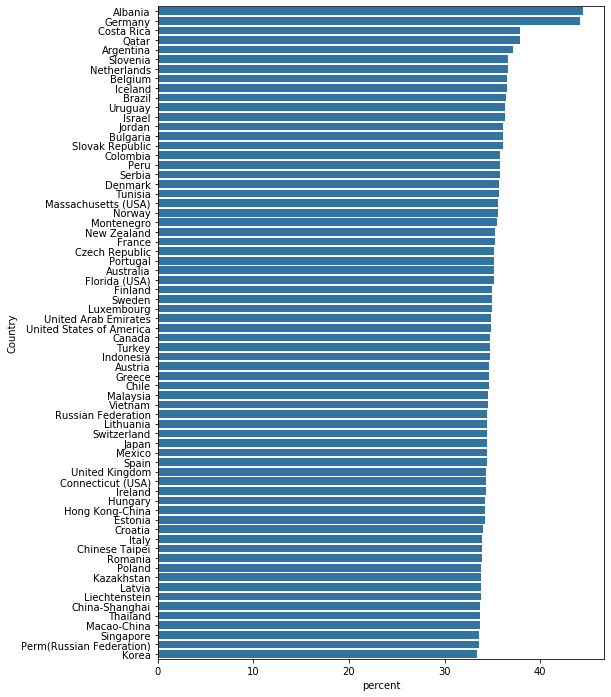

In [115]:
???plt.figure(figsize=(8,12))
sb.barplot(data = pisa_unknown.sort_values('percent', ascending=False), y ='Country', x = 'percent', color=base_color) 

In [29]:
pisa_unknown = pd.merge(pisa[pisa.Homework_hours.isnull()][['Country', 'Homework_hours']].fillna(0).groupby(['Country']).count().reset_index(),  
                          pisa[['Country', 'Homework_hours']].fillna(0).groupby(['Country']).count().reset_index(), on=['Country'])
pisa_unknown['percent'] = 100*pisa_unknown['Homework_hours_x']/pisa_unknown['Homework_hours_y']    

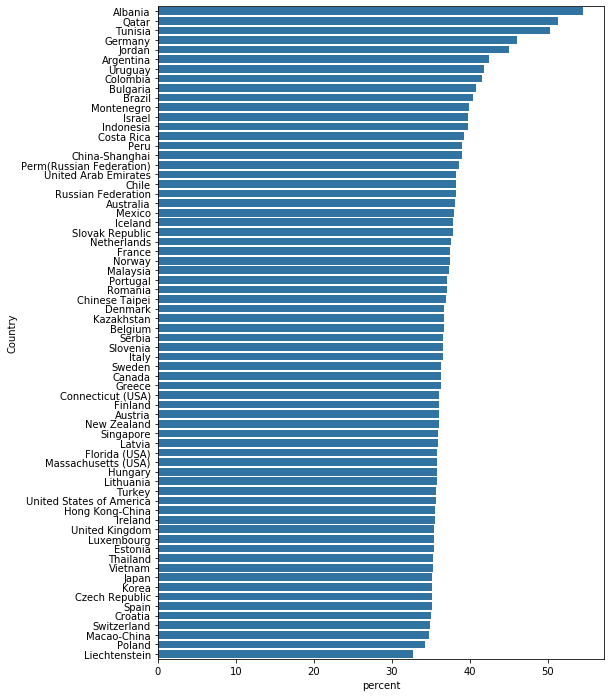

In [140]:
plt.figure(figsize=(8,12))
sb.barplot(data = pisa_unknown.sort_values('percent', ascending=False), y ='Country', x = 'percent', color=base_color) 

In [ ]:
pisa_unknown = pd.merge(pisa[pisa.Socio_economic_status.isnull()][['Country', 'Socio_economic_status']].fillna(0).groupby(['Country']).count().reset_index(),  
                          pisa[['Country', 'Socio_economic_status']].fillna(0).groupby(['Country']).count().reset_index(), on=['Country'])
pisa_unknown['percent'] = 100*pisa_unknown['Socio_economic_status_x']/pisa_unknown['Socio_economic_status_y']    


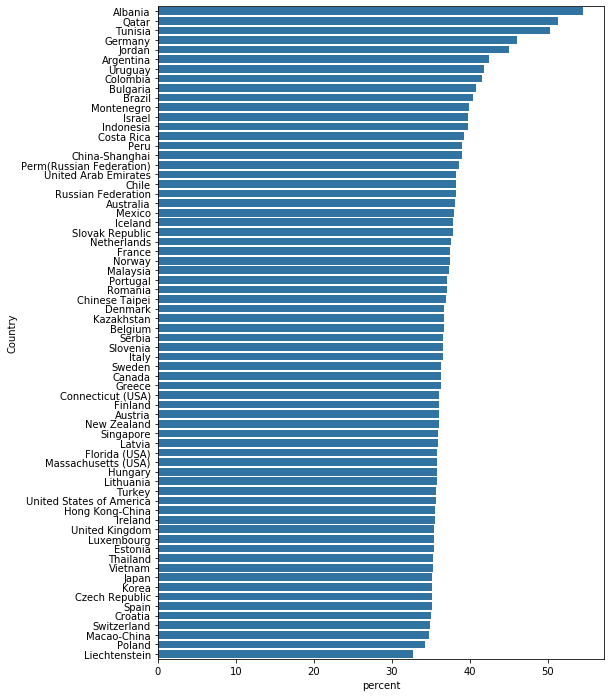

In [147]:
plt.figure(figsize=(8,12))
sb.barplot(data = pisa_unknown.sort_values('percent', ascending=False), y ='Country', x = 'percent', color=base_color) 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- All test scores: reading, math, science are normally distributed. <br>
- Most countries have around 5000 students participating or more. Countries with less students are actually subregions of other countries. I think it would be more interesting to choose two-three countries and investigate them more.<br>
- Socio_economic_status is slightly skewed left.<br>
- All students, who scored <ins>low</ins> on the math PISA test, also get low scores in reading and science. Mostly it's disadvantaged students. Interesting that Reading test results for such students are significantly skewed right. Not sufficient reading skills is one of the reasons for low math test results.
- All students, who scored <ins>high</ins> on the math PISA test, also get high scores in reading and science. It's mostly students with higher social, economic and cultural status.<br>
- Looks like most 15y.o. students around all countries attend 10th grade.<br>
- Most students spend on homework 10 hours a week or less. But there are some really hard working students who spend up to 30 hours.<br>
- Overall more students do not enjoy mathematics than enjoy it.<br>
- Parents like mathematics more than students.<br>
- But most parents think that mathematics is important or you will need it for your career. <br>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Grade variable had an outlier, some students were 96th grade. After investigation I learnt that this is an error or otherwise specially put number when grade was unknown. Such errors were 1% or less of all students in 5 different countries. I decided to substitute then with mean grade for the country.

## Bivariate Exploration

> *Let's look at correlations between numeric variables*

In [505]:
numeric_features = ['Math_score', 'Reading_score', 'Science_score', 'Socio_economic_status', 'Homework_hours', 
                    'Math_motivation', 'Math_interest', 'Math_anxiety', 'Math_self_concept',
                    'Language_in_school_min', 'Math_in_school_min', 'Science_in_school_min']

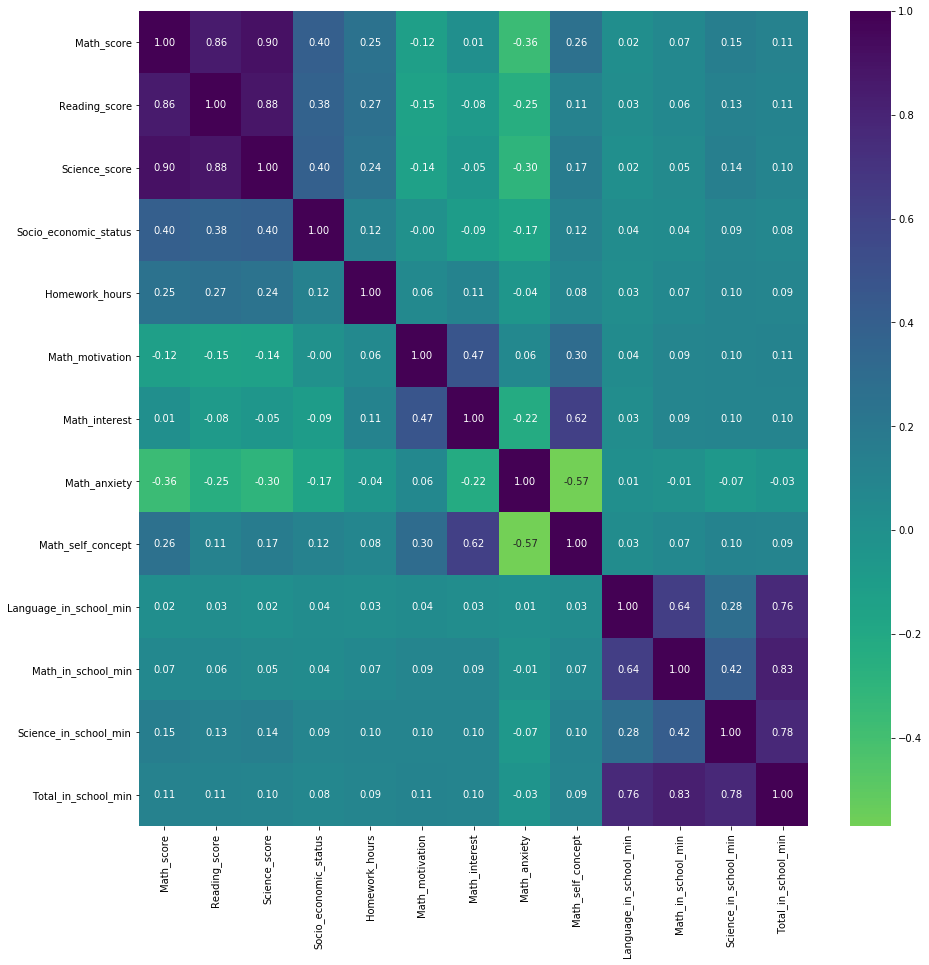

In [507]:
# correlation heatmap
plt.figure(figsize = [15, 15])
sb.heatmap(pisa[numeric_features].corr(), annot = True, fmt = '.2f',
           cmap = 'viridis_r', center = 0)
plt.show()

*- All three subject scores are highly correlated with one another, which tell us the students rarely choose only one subject and neglect others.* <br>
*- Correlation between Social_economic status and test results is around 0.4. Students who have more economical, educational resources and support at home tend to get higher scores.*<br>
*- Amount of time students spend on subjects at school has very small influence on test scores*<br>
*- Homework_hour has weak correlation with test scores.*<br>
*- Math anxiety is negatively correlated with Math_self_concept (person's believes about his\her abilities in math)*<br>
*- Math anxiety is negatively correlated not only with math test score, but also with reading and science scores*<br>
*- Unexpectedly beliefs of others about math(Math_motivation) have negative, but weak correlation with test scores*<br>
*- There is correlation 0.6 between person's Math_interst and Math_self_concept(beliefs in being good at math)
<br><br>
*Let's plot some of the correlations*

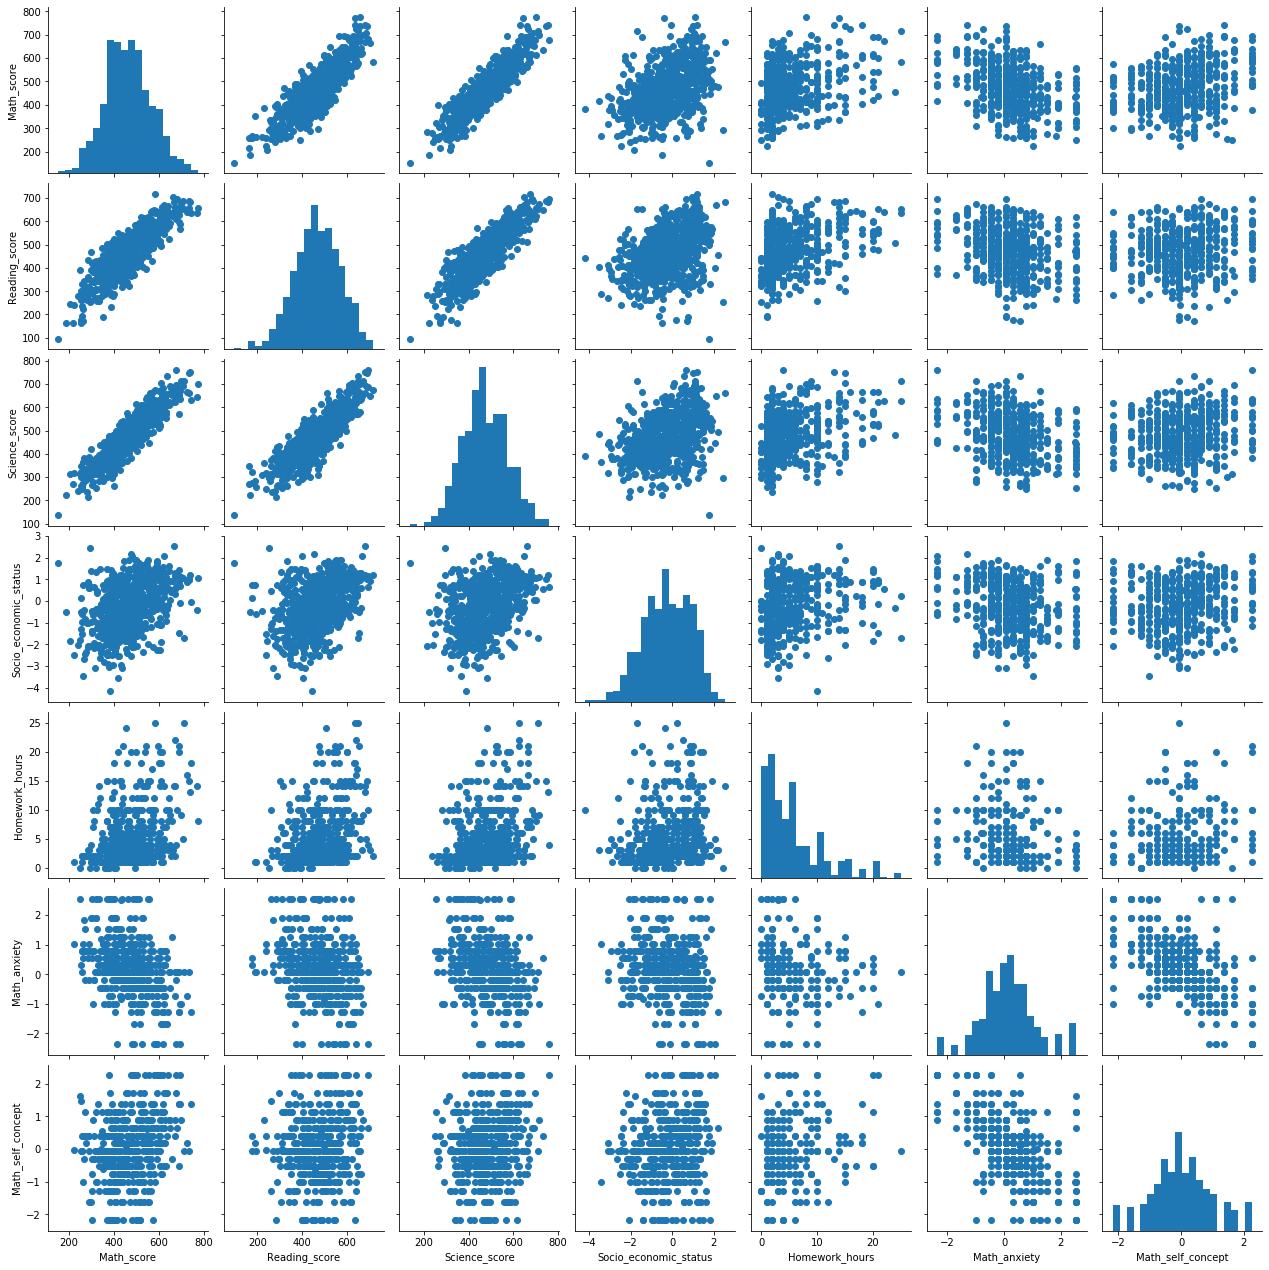

In [530]:
numeric_features = ['Math_score', 'Reading_score', 'Science_score', 'Socio_economic_status', 'Homework_hours', 
                    'Math_anxiety', 'Math_self_concept']
samples = np.random.choice(pisa.shape[0], 700, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = numeric_features)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Also we can see that disadvantaged students rarely almost never spend more than 10 hours a week on homework. And we can see this in the scores: students who got really bad scores spend less than 6 hours a week on homework. <br>

Now I want to see how test scores correlate with the categorical variables.

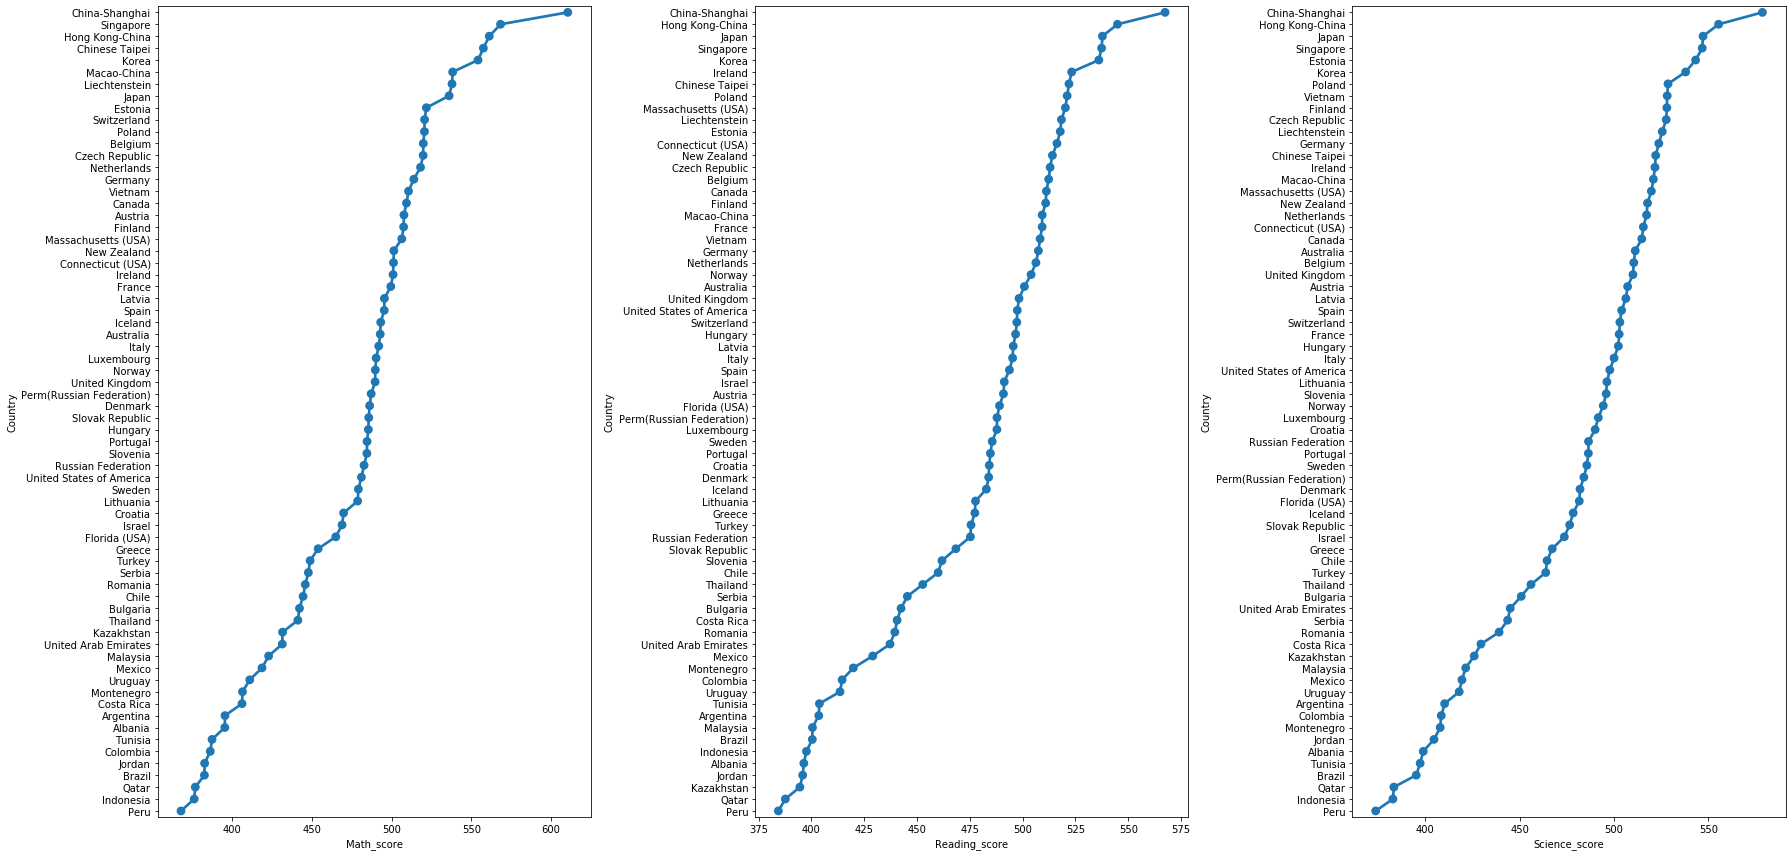

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
sb.pointplot(data = pisa[['Country', 'Math_score']].groupby('Country', as_index=False).mean().sort_values('Math_score', ascending=False), y ='Country', x = 'Math_score') 
plt.subplot(1, 3, 2)
sb.pointplot(data = pisa[['Country', 'Reading_score']].groupby('Country', as_index=False).mean().sort_values('Reading_score', ascending=False), y ='Country', x = 'Reading_score') 
plt.subplot(1, 3, 3)
sb.pointplot(data = pisa[['Country', 'Science_score']].groupby('Country', as_index=False).mean().sort_values('Science_score', ascending=False), y ='Country', x = 'Science_score') 
fig.tight_layout()

*East Asian countries: China, Korea, Japan have the highest mean scores in all subjects. Florida has the worst scores among three US states presented in all plots.*

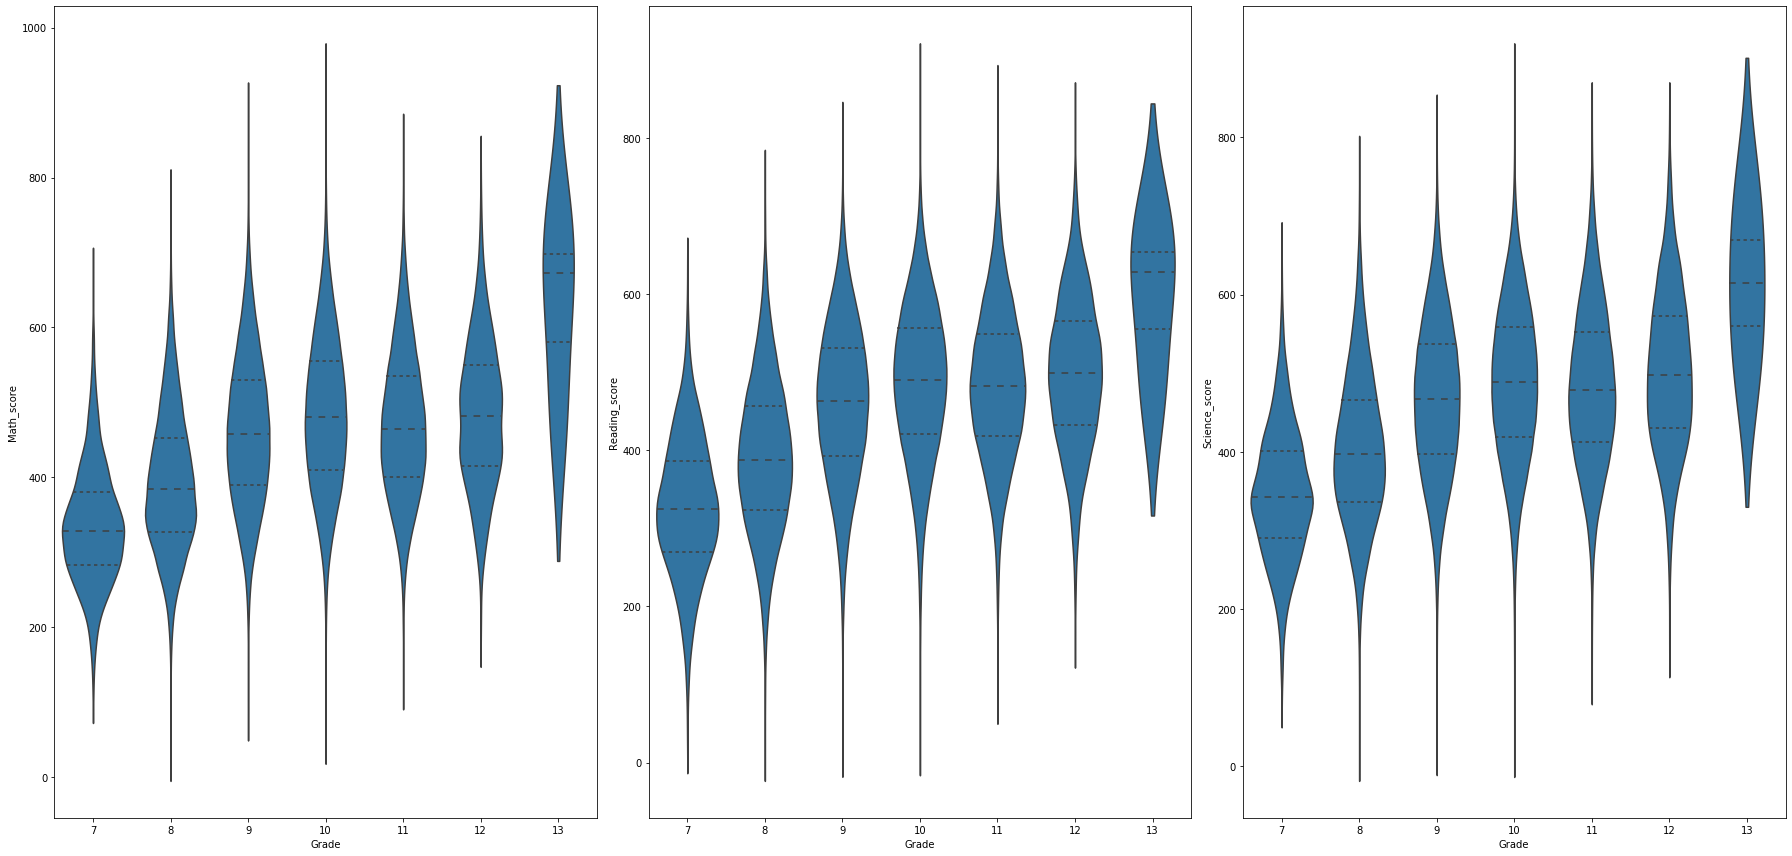

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
sb.violinplot(data = pisa,x='Grade', y = 'Math_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 2)
sb.violinplot(data = pisa,x='Grade', y = 'Reading_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 3)
sb.violinplot(data = pisa,x='Grade', y = 'Science_score', color = base_color, inner = 'quartile')
fig.tight_layout()

*Well, It's not surprising that the score increases with grade, but it is interesting that 10th graders outperform 11th graders.*

In [ ]:
categoric_features = ['Country','Gender', 'Grade', 'School_ID', 'Students_enjoy_math']
#Categorical: Country, Grade, Gender, School_ID.
#Variables Students_enjoy_math, Parents_like_math, Parents_math_important, Parents_math_for_career are ordered categorical variables with the following levels.


In [ ]:
sb.boxplot(data = pisa,x='Gender', y = 'Math_score', color = base_color)

In [ ]:
> Country vs homework hours

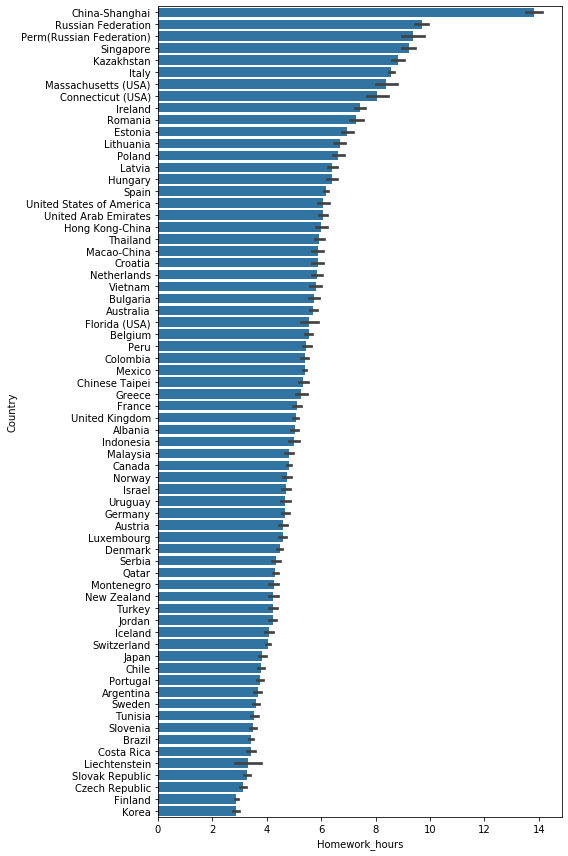

In [145]:
plt.figure(figsize=[8, 12])
grp_order = pisa.groupby('Country').Homework_hours.agg('mean').sort_values(ascending=False).index
sb.barplot(data = pisa.sort_values('Homework_hours', ascending=False), x = 'Homework_hours', y = 'Country', color = base_color, order=grp_order)
plt.tight_layout()

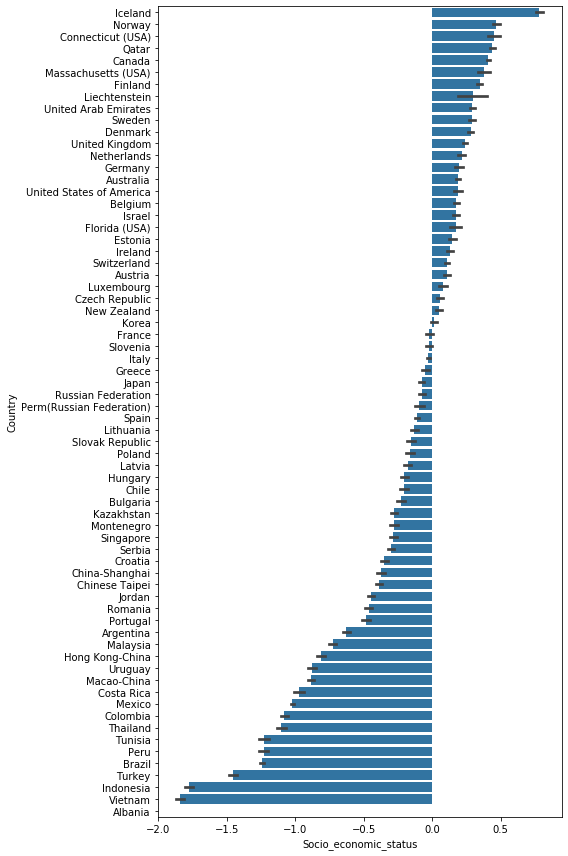

In [531]:
plt.figure(figsize=[8, 12])
grp_order = pisa.groupby('Country').Socio_economic_status.agg('mean').sort_values(ascending=False).index
sb.barplot(data = pisa.sort_values('Socio_economic_status', ascending=False), x = 'Socio_economic_status', y = 'Country', color = base_color, order=grp_order)
plt.tight_layout()

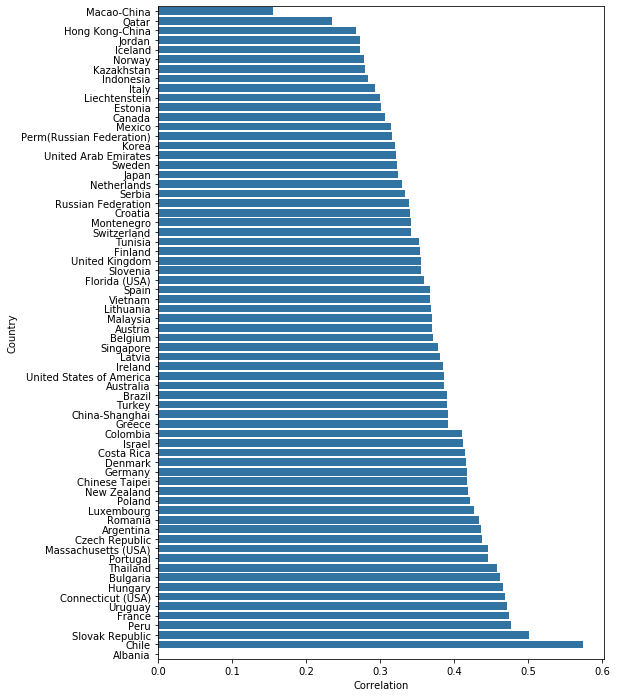

In [517]:
#Correlation between math_score and Socio_economic_status by Country
data = []
for country in pisa.Country.unique():
    df = pisa[pisa['Country'] == country]
    cor = df['Math_score'].corr(df['Socio_economic_status'])
    data.append([country, cor])
df_math_ses_cor = pd.DataFrame(data, columns = ['Country', 'Correlation'])
plt.figure(figsize=(8,12))
sb.barplot(data = df_math_ses_cor.sort_values('Correlation', ascending=True), y ='Country', x = 'Correlation', color=base_color);

In [ ]:
bin_idxs = pd.cut(pisa['num_var'], 4, right = False, include_lowest = True,
                  labels = False).astype(int)
pts_per_bin = df.groupby(bin_idxs).size()

In [ ]:
pd.qcut(df['ext price'], q=4)

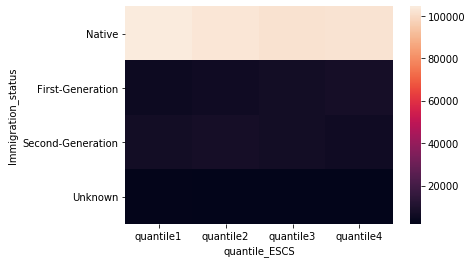

In [42]:
heat_counts = pisa.groupby(['Immigration_status', 'quantile_ESCS']).size()
heat_counts = heat_counts.reset_index(name='count')
heat_counts = heat_counts.pivot(index = 'Immigration_status', columns = 'quantile_ESCS', values = 'count')
sb.heatmap(heat_counts)

In [38]:
#xbin_edges = np.arange(-6, pisa['Socio_economic_status'].max()+0.5, 2.5)
#ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)
pisa['quantile_ESCS']=pd.qcut(pisa['Socio_economic_status'], 4, labels = ['quantile1','quantile2','quantile3','quantile4'])
#.astype(int)
#pd.qcut(pisa['Socio_economic_status'], q=4)

In [39]:
pisa.groupby(['Country','quantile_ESCS']).count()

School_ID   Grade  Gender  Enjoy_math  \
Country   quantile_ESCS                                          
Albania   quantile1            NaN     NaN     NaN         NaN   
          quantile2            NaN     NaN     NaN         NaN   
          quantile3            NaN     NaN     NaN         NaN   
          quantile4            NaN     NaN     NaN         NaN   
Argentina quantile1         2276.0  2276.0  2276.0      2276.0   
...                            ...     ...     ...         ...   
Uruguay   quantile4          684.0   684.0   684.0       684.0   
Vietnam   quantile1         3986.0  3986.0  3986.0      3986.0   
          quantile2          494.0   494.0   494.0       494.0   
          quantile3          302.0   302.0   302.0       302.0   
          quantile4          177.0   177.0   177.0       177.0   

                         Homework_hours  Socio_economic_status  \
Country   quantile_ESCS                                          
Albania   quantile1                 NaN                    NaN   
          quantile2                 NaN                    NaN   
          quantile3                 NaN                    NaN   
          quantile4                 NaN                    NaN   
Argentina quantile1              1260.0                 2276.0   
...                                 ...                    ...   
Uruguay   quantile4               429.0                  684.0   
Vietnam   quantile1              2579.0                 3986.0   
          quantile2               321.0                  494.0   
          quantile3               195.0                  302.0   
          quantile4               117.0                  177.0   

                         Immigration_status  Language_at_home  Math_score  \
Country   quantile_ESCS                                                     
Albania   quantile1                     NaN               NaN         NaN   
          quantile2                     NaN               NaN         NaN   
          quantile3                     NaN               NaN         NaN   
          quantile4                     NaN               NaN         NaN   
Argentina quantile1                  2276.0            2276.0      2276.0   
...                                     ...               ...         ...   
Uruguay   quantile4                   684.0             684.0       684.0   
Vietnam   quantile1                  3986.0            3986.0      3986.0   
          quantile2                   494.0             494.0       494.0   
          quantile3                   302.0             302.0       302.0   
          quantile4                   177.0             177.0       177.0   

                         Reading_score  Science_score  
Country   quantile_ESCS                                
Albania   quantile1                NaN            NaN  
          quantile2                NaN            NaN  
          quantile3                NaN            NaN  
          quantile4                NaN            NaN  
Argentina quantile1             2276.0         2276.0  
...                                ...            ...  
Uruguay   quantile4              684.0          684.0  
Vietnam   quantile1             3986.0         3986.0  
          quantile2              494.0          494.0  
          quantile3              302.0          302.0  
          quantile4              177.0          177.0  

[272 rows x 11 columns]

In [43]:
#Let's filter USA tates 
pisa_usa = pisa[((pisa.Country == 'Florida (USA)') | (pisa.Country == 'Connecticut (USA)') | (pisa.Country == 'Massachusetts (USA)'))]
#pisa[pisa.CNT == 'United States of America']
print(pisa_usa.shape)
pisa_canada = pisa[pisa.Country == 'Canada']
#pisa[pisa.CNT == 'United States of America']
print(pisa_canada.shape)


(5316, 13)
(21544, 13)


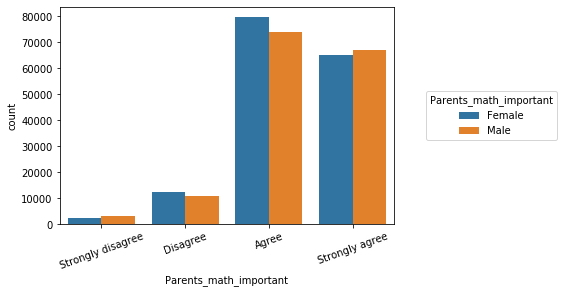

In [523]:
#Parents_math_important by Grade
sb.countplot(data = pisa, x = 'Parents_math_important', hue = 'Gender');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Parents_math_important')
plt.xticks(rotation = 20);

#!!!Change order of Parents_math_important

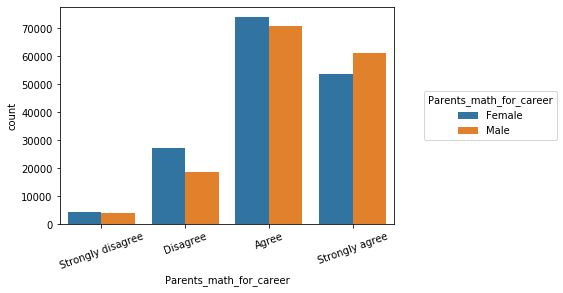

In [524]:
 #Parents_math_for_career
sb.countplot(data = pisa, x = 'Parents_math_for_career', hue = 'Gender');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Parents_math_for_career')
plt.xticks(rotation = 20);

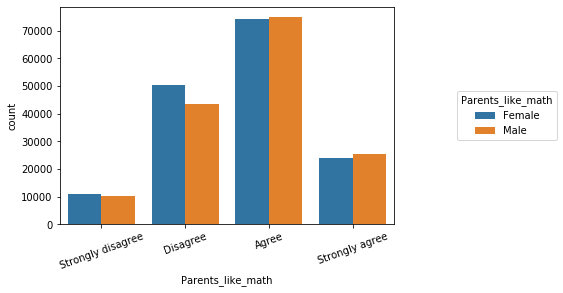

In [526]:
#Parents_like_math
sb.countplot(data = pisa, x = 'Parents_like_math', hue = 'Gender');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Parents_like_math')
plt.xticks(rotation = 20);

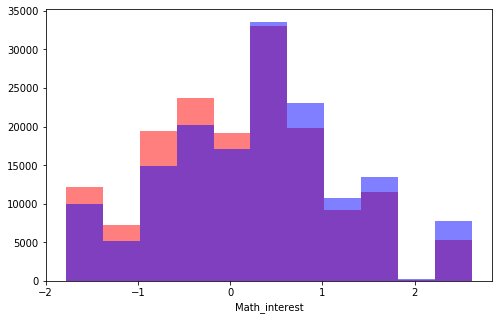

In [485]:
#Math interest by gender
#sb.pointplot(data = pisa[['Math_interest', 'Gender']], x = 'Math_interest', hue = 'Gender');
#plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Gender')

binsize = 0.4
bins = np.arange(pisa['Math_interest'].min(), pisa['Math_interest'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_interest', bins = bins, color='red', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_interest', bins = bins, color='blue', alpha=0.5, label='Male')
plt.xlabel('Math_interest')
plt.show()

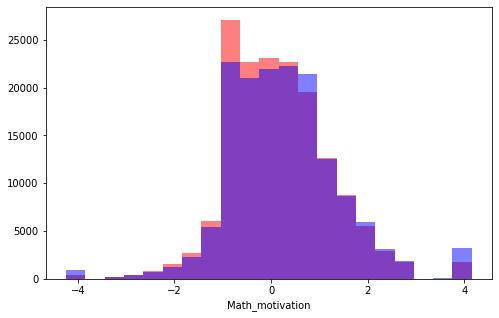

In [486]:
binsize = 0.4
bins = np.arange(pisa['Math_motivation'].min(), pisa['Math_motivation'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_motivation', bins = bins, color='red', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_motivation', bins = bins, color='blue', alpha=0.5, label='Male')
plt.xlabel('Math_motivation')
plt.show()


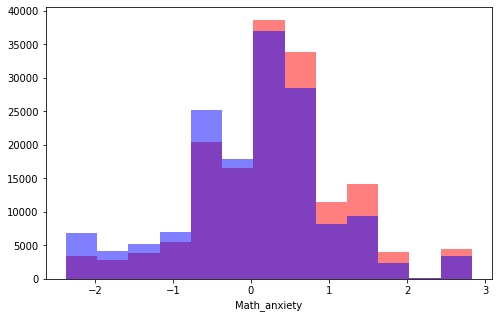

In [487]:
#Math_anxiety

binsize = 0.4
bins = np.arange(pisa['Math_anxiety'].min(), pisa['Math_anxiety'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_anxiety', bins = bins, color='red', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_anxiety', bins = bins, color='blue', alpha=0.5, label='Male')
plt.xlabel('Math_anxiety')
plt.show()

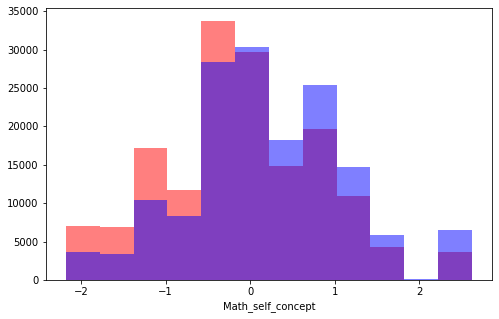

In [488]:
#Math_self_concept
binsize = 0.4
bins = np.arange(pisa['Math_self_concept'].min(), pisa['Math_self_concept'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_self_concept', bins = bins, color='red', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_self_concept', bins = bins, color='blue', alpha=0.5, label='Male')
plt.xlabel('Math_self_concept')
plt.show()

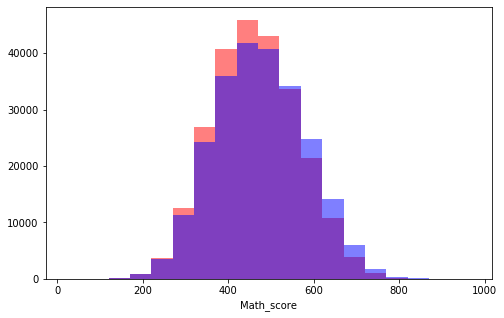

In [490]:
#Math_score
binsize = 50
bins = np.arange(pisa['Math_score'].min(), pisa['Math_score'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Gender =="Female"'), x = 'Math_score', bins = bins, color='red', alpha=0.5, label='Female')
plt.hist(data = pisa.query('Gender =="Male"'), x = 'Math_score', bins = bins, color='blue', alpha=0.5, label='Male')
plt.xlabel('Math_score')
plt.show()

In [491]:
df_girls_math =pisa.query('Gender =="Female"').groupby(['Country'], as_index=False).mean()[['Country','Math_score']]
df_girls_math.rename(columns={"Math_score":"girl_math"}, inplace=True)
df_boys_math = pisa.query('Gender =="Male"').groupby(['Country'], as_index=False).mean()[['Country','Math_score']]
df_boys_math.rename(columns={"Math_score":"boy_math"}, inplace=True)
#df_boys_math
df_math_diff = pd.concat([df_girls_math, df_boys_math['boy_math']], axis=1, sort=False)
df_math_diff['diff'] = df_math_diff['girl_math'] - df_math_diff['boy_math']

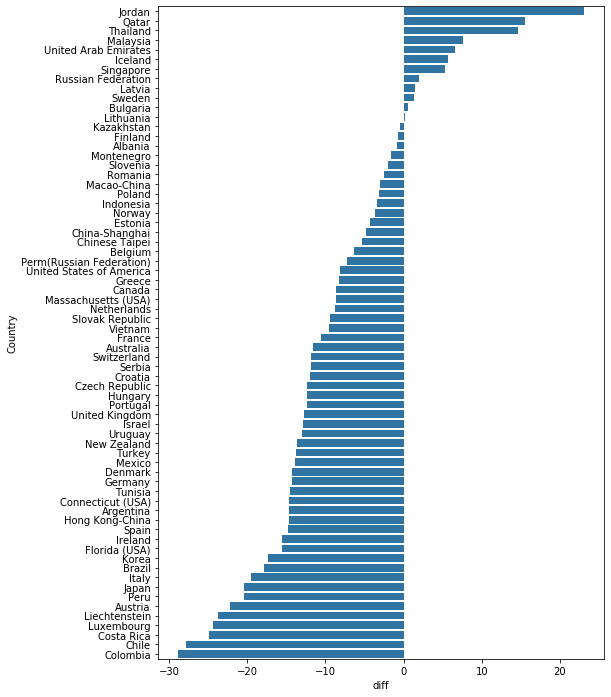

In [492]:
#df_math_diff
plt.figure(figsize=(8,12))
sb.barplot(data = df_math_diff.sort_values('diff', ascending=False), y ='Country', x = 'diff', color=base_color) 

In [493]:
print(pisa.query('Gender =="Female"')['Math_score'].mean())
print(pisa.query('Gender =="Male"')['Math_score'].mean())

464.0335335847111
475.3175716657063


*Is there a difference between schools, between average student backgrounds in these schools(Socio_economic_status)?* 
*I'll explore this question in Bivariate Exploration part*

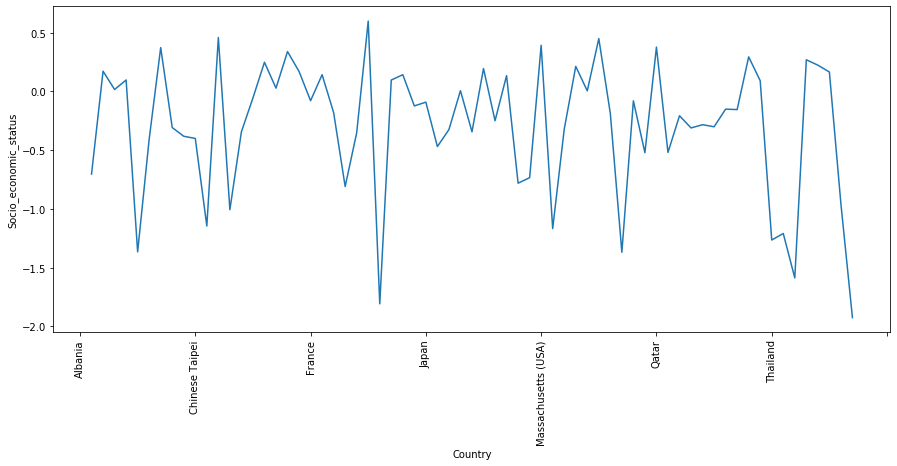

In [339]:
pisa.groupby(['Country', 'School_ID']).mean()['Socio_economic_status'].groupby(['Country']).mean().plot(figsize = (15,6));
plt.xticks(rotation=90)
plt.ylabel('Socio_economic_status');

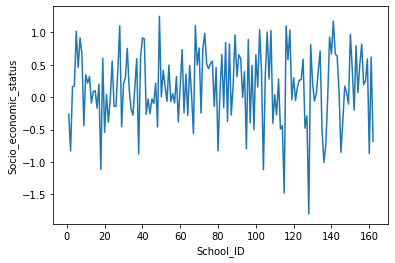

In [340]:
pisa.query('Country == "United States of America"').groupby(['School_ID']).mean()['Socio_economic_status'].plot()
plt.ylabel('Socio_economic_status');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


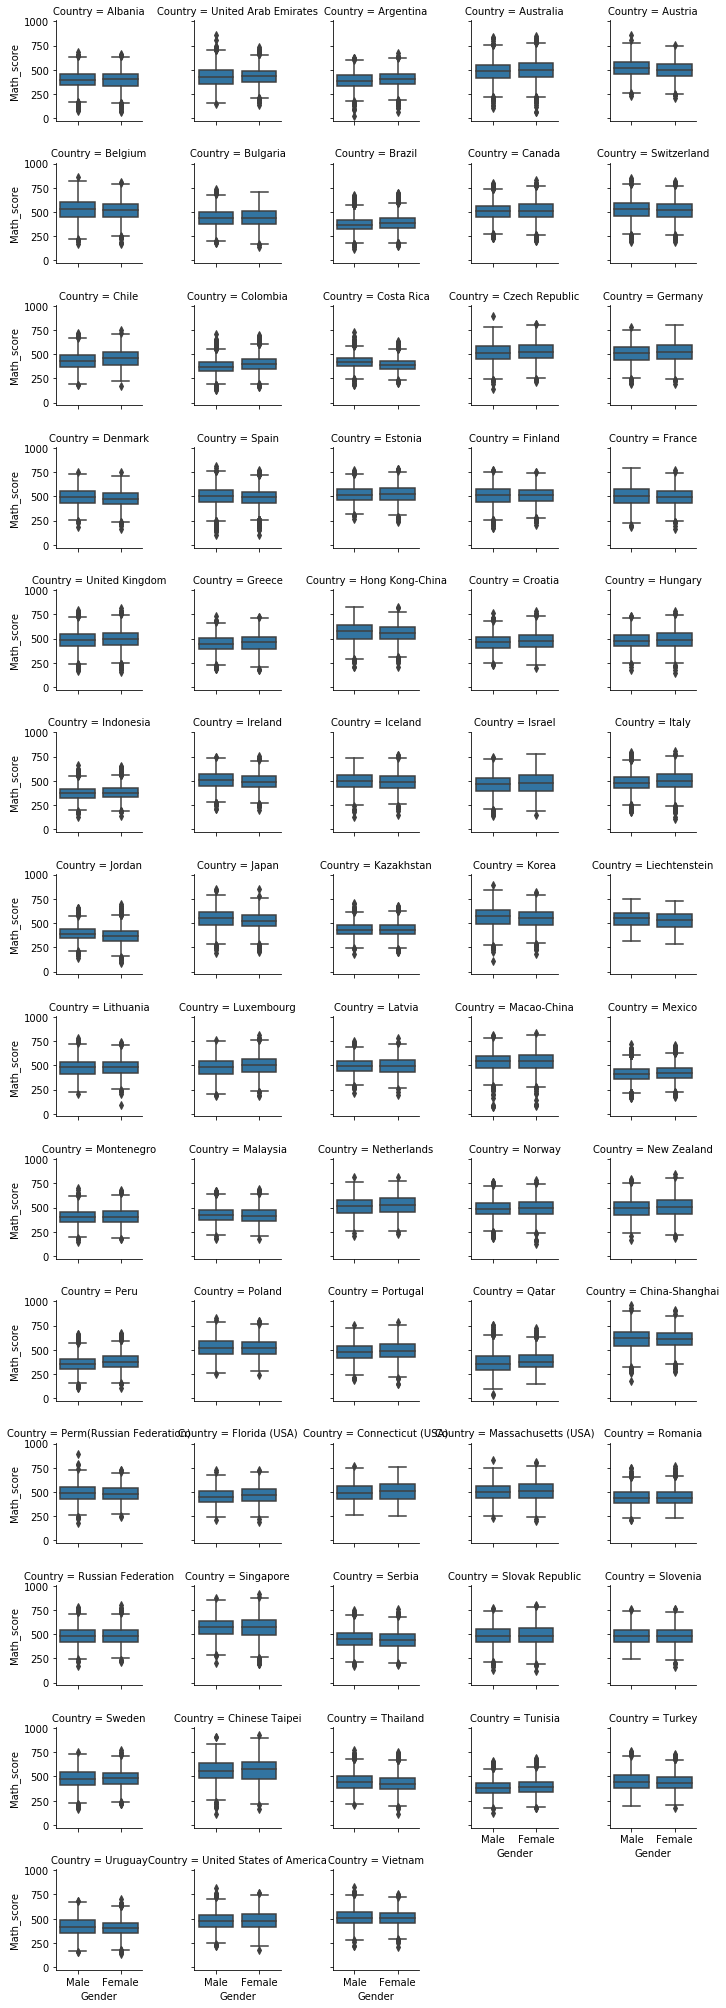

In [481]:
g = sb.FacetGrid(data = pisa, col = 'Country', col_wrap = 5, size = 2)
g.map(sb.boxplot,'Gender', 'Math_score', color = base_color)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

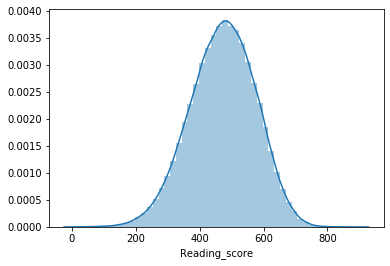

In [270]:
sb.distplot(pisa['Reading_score'], norm_hist=True, color = base_color);

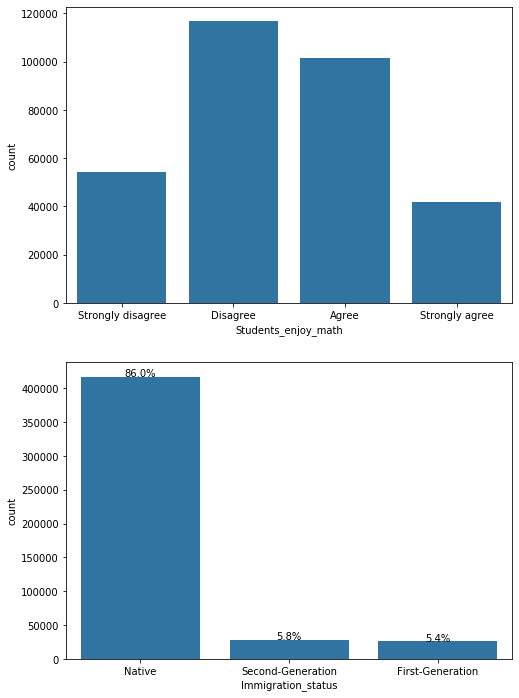

In [483]:
fig, ax = plt.subplots(nrows=2, figsize = [8,12]);
sb.countplot(data = pisa, x = 'Students_enjoy_math', color=base_color, ax = ax[0]);
sb.countplot(data = pisa, x = 'Immigration_status', color=base_color, ax = ax[1]);
n_points = pisa.shape[0]
cat_counts = pisa['Immigration_status'].value_counts()
locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)    
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


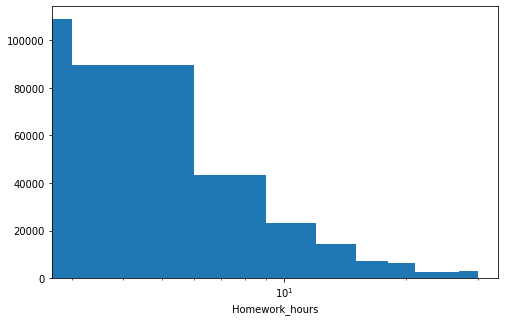

In [484]:
log_binsize = 1
bins = 10 ** np.arange(2.4, np.log10(pisa['Homework_hours'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Homework_hours')#, bins = bins)
plt.xscale('log')
#plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Homework_hours')
plt.show()

## References

https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.read_csv.html <br>
https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf <br>
https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf<br>
https://stackoverflow.com/questions/41659188/how-to-adjust-subplot-size-in-seaborn <br>
